In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('/era_tour_setlist.csv')

In [ ]:
df.head(3)

,artist_name,track_name,is_explicit,album_release_date,genres,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature,popularity
0,Taylor Swift,Miss Americana & The Heartbreak Prince,False,2019-08-23,pop,0.662,0.487,0.747,-6.926,0.0280,0.006150,0.1380,0.0736,11,150.088,0,234147,4,79
1,Taylor Swift,Cruel Summer,False,2019-08-23,pop,0.552,0.564,0.702,-5.707,0.1170,0.000021,0.1050,0.1570,9,169.994,1,178427,4,94
2,Taylor Swift,The Man,False,2019-08-23,pop,0.777,0.633,0.658,-5.191,0.0767,0.000000,0.0901,0.0540,0,110.048,1,190360,4,82


In [ ]:
df.columns

Index(['artist_name', 'track_name', 'is_explicit', 'album_release_date',
       'genres', 'danceability', 'valence', 'energy', 'loudness',
       'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'key',
       'tempo', 'mode', 'duration_ms', 'time_signature', 'popularity'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_name         44 non-null     object 
 1   track_name          44 non-null     object 
 2   is_explicit         44 non-null     bool   
 3   album_release_date  44 non-null     object 
 4   genres              44 non-null     object 
 5   danceability        44 non-null     float64
 6   valence             44 non-null     float64
 7   energy              44 non-null     float64
 8   loudness            44 non-null     float64
 9   acousticness        44 non-null     float64
 10  instrumentalness    44 non-null     float64
 11  liveness            44 non-null     float64
 12  speechiness         44 non-null     float64
 13  key                 44 non-null     int64  
 14  tempo               44 non-null     float64
 15  mode                44 non-null     int64  
 16  duration_m

In [ ]:
df.isnull().sum()

artist_name           0
track_name            0
is_explicit           0
album_release_date    0
genres                0
danceability          0
valence               0
energy                0
loudness              0
acousticness          0
instrumentalness      0
liveness              0
speechiness           0
key                   0
tempo                 0
mode                  0
duration_ms           0
time_signature        0
popularity            0
dtype: int64

In [ ]:
missing_values = df.isnull().sum()

duplicated_tracks = df['track_name'].duplicated(keep=False)

print(f"Duplicates: {missing_values}, Matching track names: {duplicated_tracks.tolist()}")

Duplicates: artist_name           0
track_name            0
is_explicit           0
album_release_date    0
genres                0
danceability          0
valence               0
energy                0
loudness              0
acousticness          0
instrumentalness      0
liveness              0
speechiness           0
key                   0
tempo                 0
mode                  0
duration_ms           0
time_signature        0
popularity            0
dtype: int64, Matching track names: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [ ]:
print(df.dtypes)

artist_name            object
track_name             object
is_explicit              bool
album_release_date     object
genres                 object
danceability          float64
valence               float64
energy                float64
loudness              float64
acousticness          float64
instrumentalness      float64
liveness              float64
speechiness           float64
key                     int64
tempo                 float64
mode                    int64
duration_ms             int64
time_signature          int64
popularity              int64
dtype: object


In [ ]:
columns = []

for column in df.columns:
    if df[column].dtype == np.int64:
        print("int64 datatype found in column:", column)
        columns.append(column)
    else:
        print(f"Column '{column}' is of dtype '{df[column].dtype}'")

df[columns] = df[columns].astype('category')

print("\nUpdated DataFrame:")
print(df)
print("\nData Types after conversion:")
print(df.dtypes)

Column 'artist_name' is of dtype 'object'
Column 'track_name' is of dtype 'object'
Column 'is_explicit' is of dtype 'bool'
Column 'album_release_date' is of dtype 'object'
Column 'genres' is of dtype 'object'
Column 'danceability' is of dtype 'float64'
Column 'valence' is of dtype 'float64'
Column 'energy' is of dtype 'float64'
Column 'loudness' is of dtype 'float64'
Column 'acousticness' is of dtype 'float64'
Column 'instrumentalness' is of dtype 'float64'
Column 'liveness' is of dtype 'float64'
Column 'speechiness' is of dtype 'float64'
int64 datatype found in column: key
Column 'tempo' is of dtype 'float64'
int64 datatype found in column: mode
int64 datatype found in column: duration_ms
int64 datatype found in column: time_signature
int64 datatype found in column: popularity

Updated DataFrame:
     artist_name                                         track_name  \
0   Taylor Swift             Miss Americana & The Heartbreak Prince   
1   Taylor Swift                                 

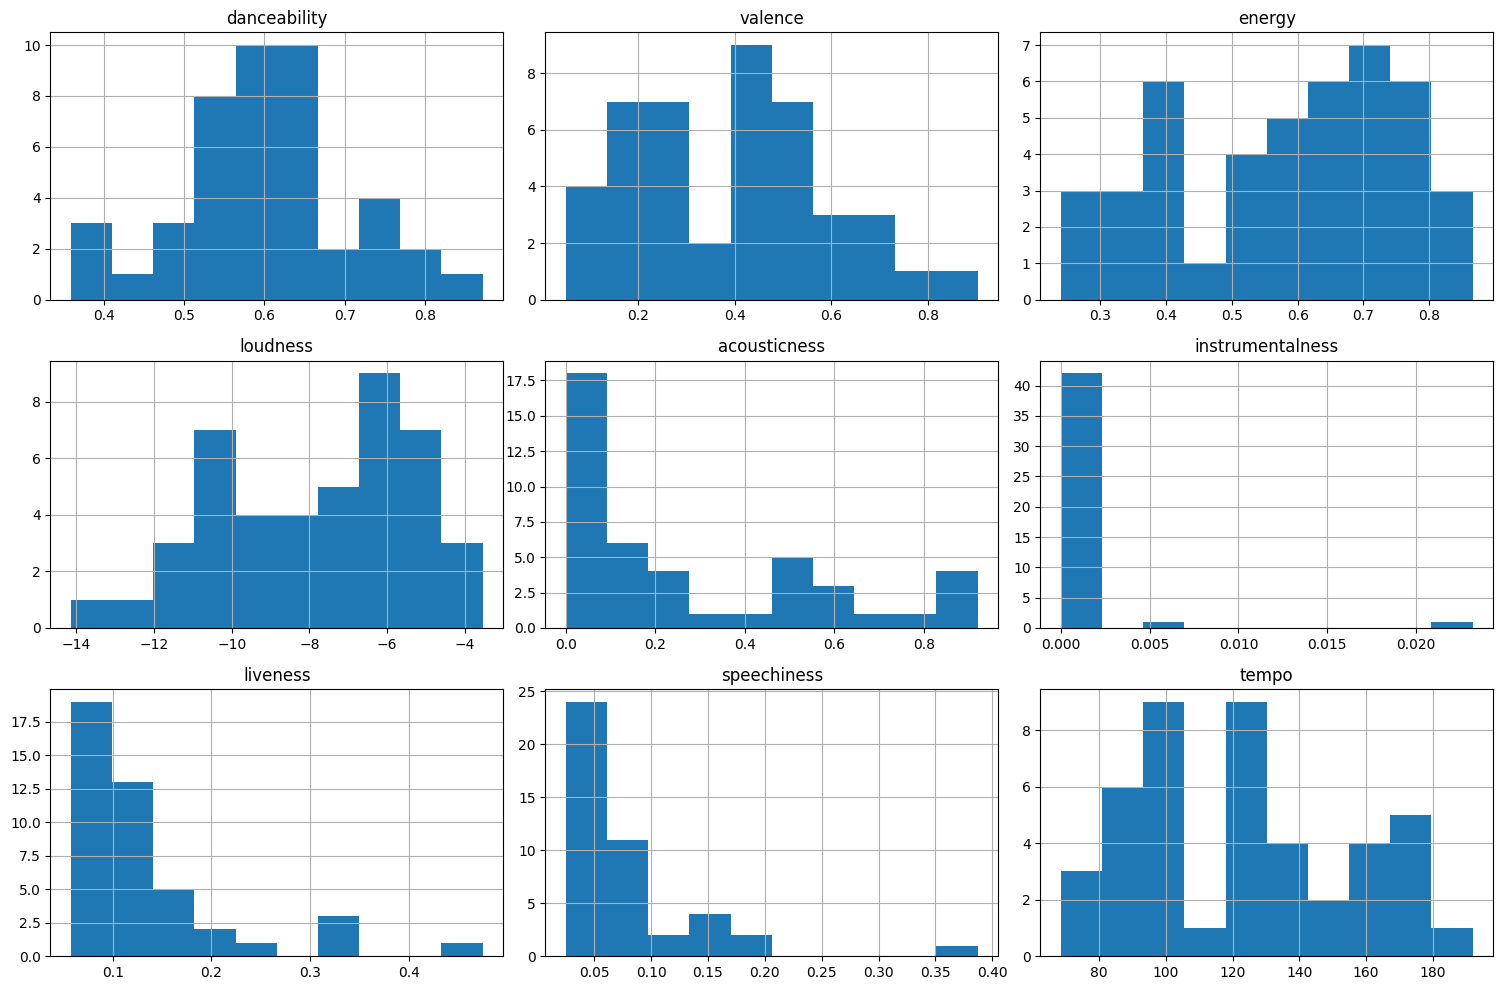

In [ ]:
num_cols = ['danceability', 'valence', 'energy', 'loudness', 'acousticness',
            'instrumentalness', 'liveness', 'speechiness', 'tempo', 'duration_ms']

df[num_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [21]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'])

In [23]:
df['year'] = df['album_release_date'].dt.year
energy_trend = df.groupby('year')['energy'].mean().reset_index()
print(energy_trend)

   year    energy
0  2017  0.602750
1  2019  0.664200
2  2020  0.441125
3  2021  0.680286
4  2022  0.464571
5  2023  0.712000
6  2024  0.548143


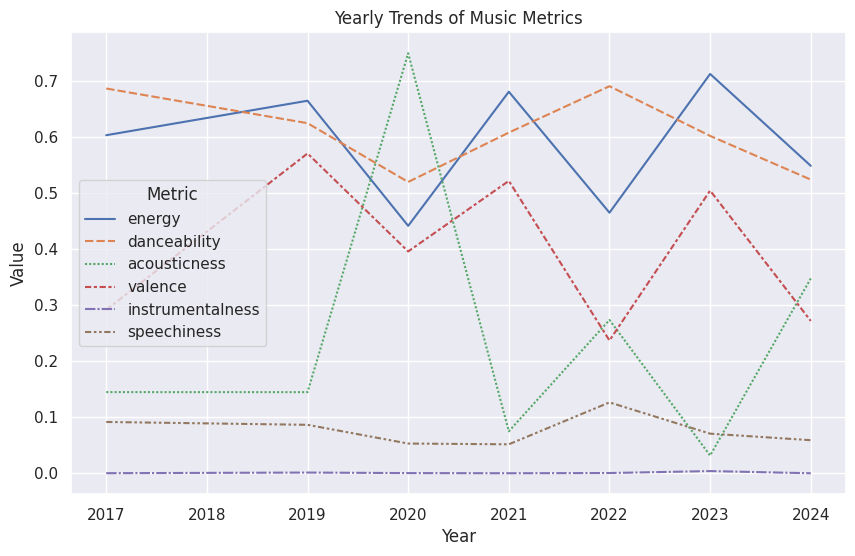

In [31]:
melted_yearly_means = pd.melt(yearly_means, id_vars=['year'],
                              value_vars=['energy', 'danceability', 'acousticness', 'valence', 'instrumentalness', 'speechiness'],
                              var_name='metric', value_name='value')

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='value', hue='metric', style='metric', data=melted_yearly_means)

plt.legend(title='Metric')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Yearly Trends of Music Metrics')
plt.show()

<ipython-input-32-b4e43fb714bb>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




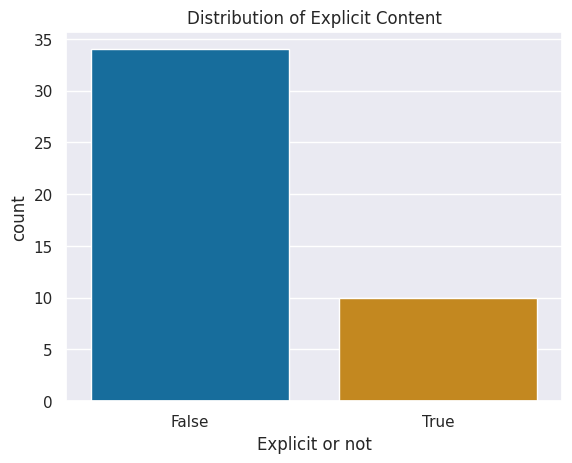

In [32]:
sns.countplot(x='is_explicit', data=df, palette="colorblind")
plt.title('Distribution of Explicit Content')
plt.xlabel('Explicit or not')
plt.show()

In [33]:
attributes = ['danceability', 'valence', 'energy', 'acousticness',
            'instrumentalness', 'liveness', 'speechiness']

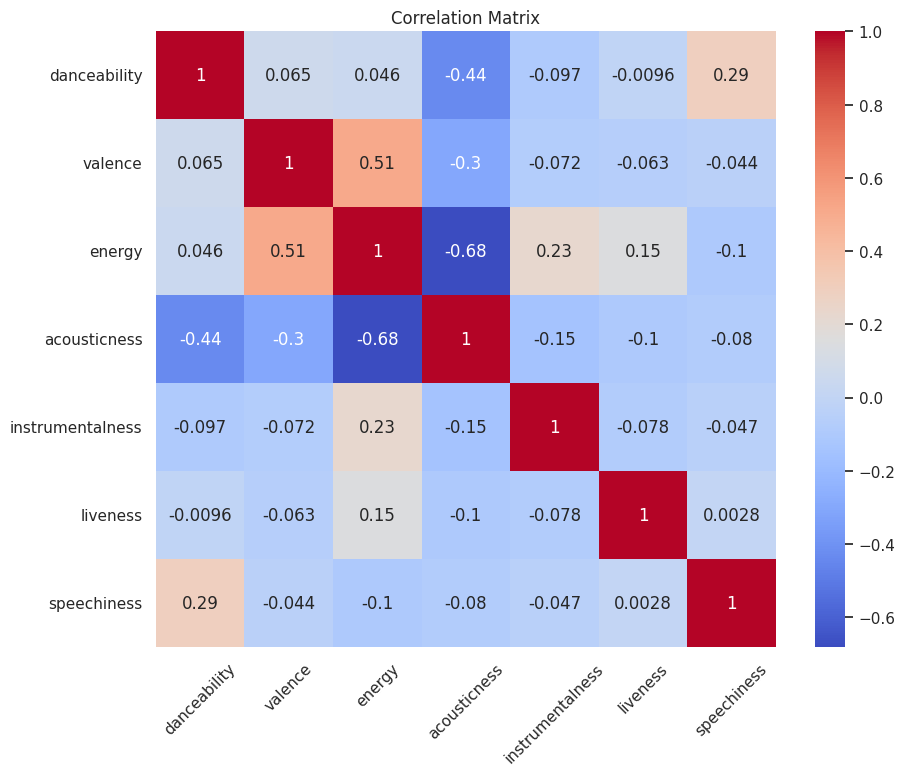

In [34]:
corr_matrix = df[attributes].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.show()

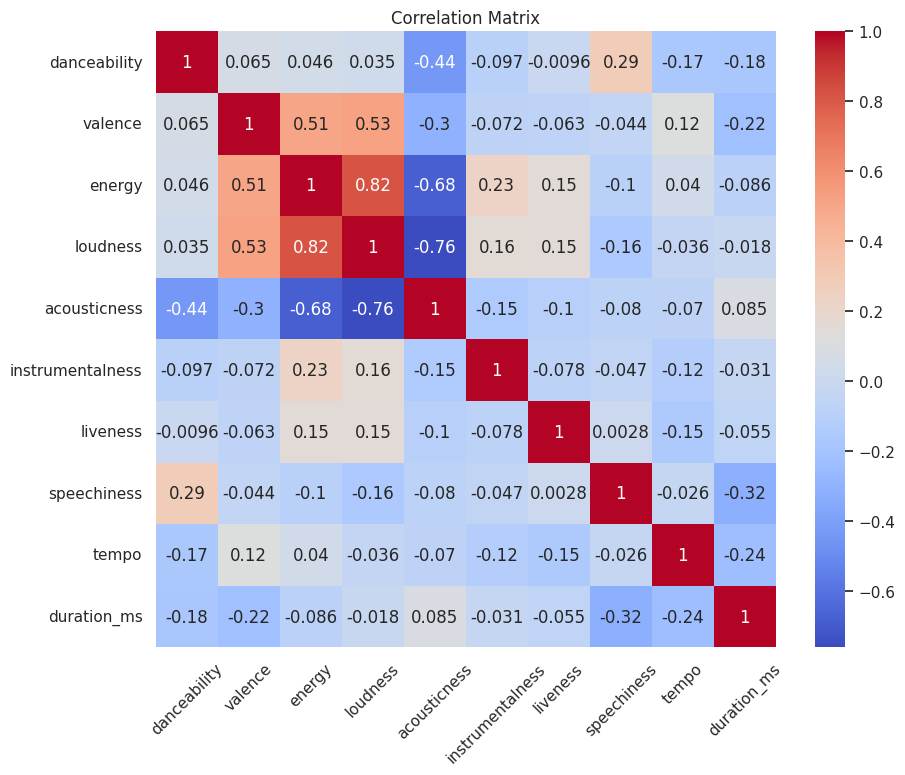

In [35]:
corr_matrix2 = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.show()

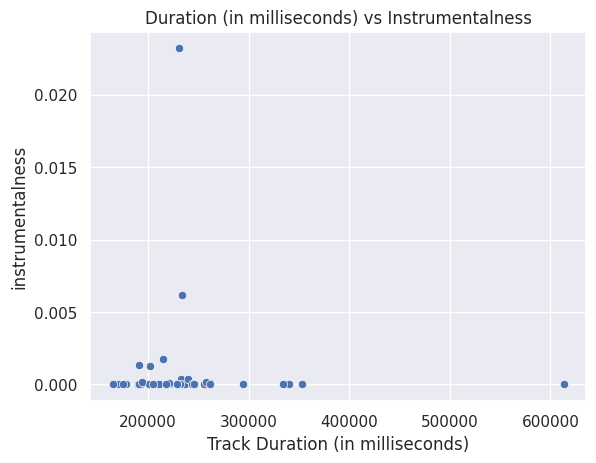

In [36]:
sns.scatterplot(x='duration_ms', y='instrumentalness', data=df)
plt.title('Duration (in milliseconds) vs Instrumentalness')
plt.xlabel('Track Duration (in milliseconds)')
plt.show()

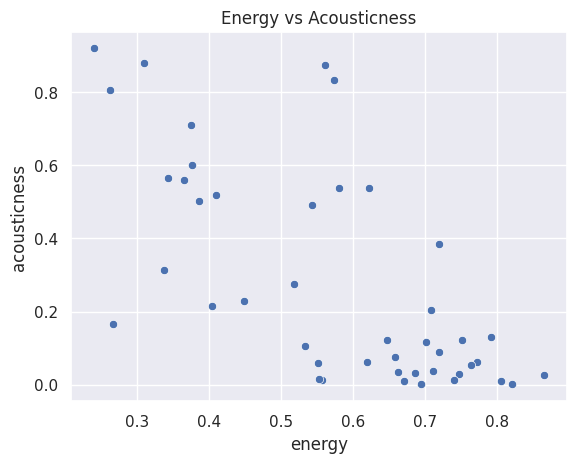

In [37]:
sns.scatterplot(x='energy', y='acousticness', data=df)
plt.title('Energy vs Acousticness')
plt.show()